In [2]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
record = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/session_record.csv',index_col=0)

In [10]:
record.shape

(662, 16)

## Extract sessions

In [11]:
K7 = record[((record['Mouse ID']=='K7') & (record['p(high Port)'] > 0))].copy()
K9 = record[((record['Mouse ID']=='K9') & (record['p(high Port)'] > 0))].copy()
K13 = record[((record['Mouse ID']=='K13') & (record['p(high Port)'] > 0))].copy()

mice = [K7,K9,K13]

In [12]:
K9

,Session ID,Mouse ID,Date,Phase,Left Reward Prob,Right Reward Prob,Block Range Min,Block Range Max,No. Trials,No. Blocks,No. Rewards,p(high Port),Decision Window Duration,Min Inter-trial-interval,Left Solenoid Duration,Right Solenoid Duration
586,02012017_K9,K9,2012017,2.0,0.0,1.0,50.0,50.0,91.0,1.0,53.0,0.58,3.0,1.0,35.0,35.0
587,02022017_K9,K9,2022017,2.0,0.0,1.0,50.0,50.0,222.0,1.0,68.0,0.31,2.0,1.0,35.0,35.0
588,02032017_K9,K9,2032017,2.0,0.0,1.0,50.0,50.0,166.0,1.0,70.0,0.42,2.0,1.0,35.0,35.0
589,02132017_K9,K9,2132017,2.0,1.0,0.0,50.0,50.0,201.0,2.0,114.0,0.57,2.0,1.0,35.0,35.0
590,02142017_K9,K9,2142017,2.0,1.0,0.0,50.0,50.0,117.0,1.0,50.0,0.44,2.0,1.0,35.0,35.0
591,02152017_K9,K9,2152017,2.0,1.0,0.0,50.0,50.0,220.0,2.0,138.0,0.63,2.0,1.0,35.0,35.0
592,02162017_K9,K9,2162017,2.0,0.0,1.0,30.0,30.0,119.0,2.0,86.0,0.72,2.0,1.0,35.0,35.0
593,02172017_K9,K9,2172017,2.0,1.0,0.0,30.0,30.0,176.0,4.0,124.0,0.70,2.0,1.0,35.0,35.0
594,02202017_K9,K9,2202017,2.0,1.0,0.0,30.0,30.0,325.0,7.0,232.0,0.71,2.0,1.0,35.0,35.0
595,02212017_K9,K9,2212017,2.0,0.1,0.9,50.0,50.0,337.0,4.0,211.0,0.68,2.0,1.0,35.0,35.0


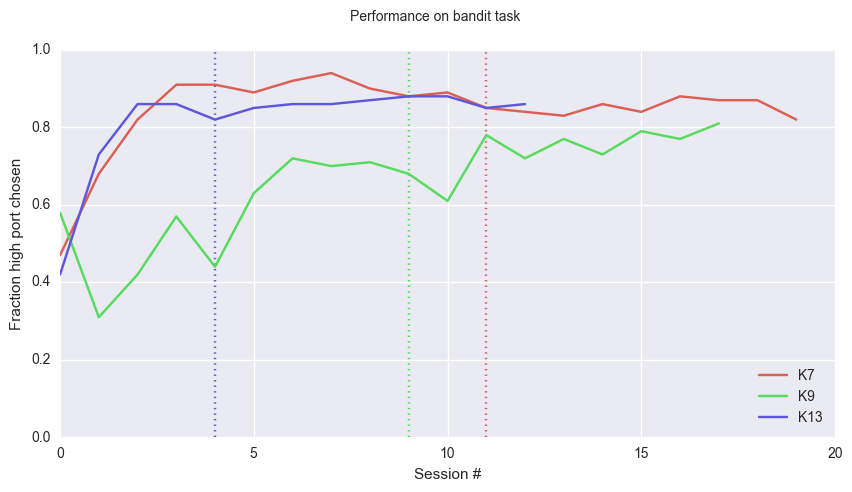

In [13]:
colorz = sns.color_palette('hls',n_colors=3)

plt.figure(figsize=(10,5))
plt.suptitle('Performance on bandit task')

for i,mouse in enumerate(mice):
    
    plt.plot(range(mouse.shape[0]),mouse['p(high Port)'].values,color=colorz[i],label=mouse['Mouse ID'].values[0])
    
    switch_90 = np.where(((mouse['Left Reward Prob'] == 0.1) | (mouse['Left Reward Prob'] == 0.9)))[0][0]
    
    plt.vlines(x=switch_90,ymin=0,ymax=1,linestyles='dotted',colors=colorz[i])
    
plt.legend(loc='lower right')
plt.xlabel('Session #')
plt.ylabel('Fraction high port chosen')

In [87]:
q43_ = record[((record['Mouse ID']=='q43') & (record['p(high Port)'] > 0))].copy()
q45_ = record[((record['Mouse ID']=='q45') & (record['p(high Port)'] > 0))].copy()
K1_ = record[((record['Mouse ID']=='K1') & (record['p(high Port)'] > 0))].copy()

(0.5, 1)

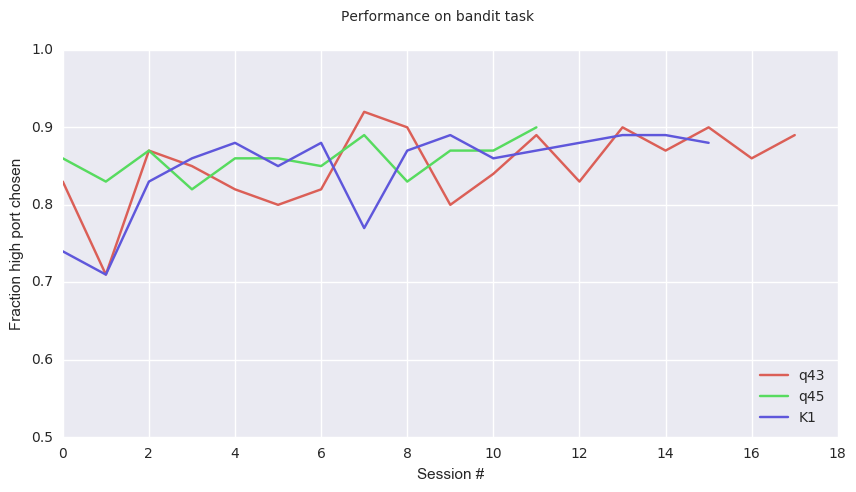

In [97]:
K1 = K1_.loc[543:].copy()
q43 = q43_.loc[623:].copy()
q45 = q45_.loc[644:].copy()

mice = [q43,q45,K1]

colorz = sns.color_palette('hls',n_colors=3)

plt.figure(figsize=(10,5))
plt.suptitle('Performance on bandit task')

for i,mouse in enumerate(mice):
    
    plt.plot(range(mouse.shape[0]),mouse['p(high Port)'].values,color=colorz[i],label=mouse['Mouse ID'].values[0])
    
plt.legend(loc='lower right')
plt.xlabel('Session #')
plt.ylabel('Fraction high port chosen')
plt.ylim(0.5,1)

In [90]:
np.unique(record['Mouse ID'].values)

array(['K1', 'K10', 'K11', 'K13', 'K4', 'K7', 'K9', 'dumble', 'harry',
       'myrtle', 'q40', 'q43', 'q45', 'quirrel', 'sprout', 'tom', 'tonks',
       'volde'], dtype=object)